In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_final_demo = pd.read_csv('df_final_demo.txt')
df_final_experiment_clients = pd.read_csv('df_final_experiment_clients.txt')
df_final_web_data_pt_1 = pd.read_csv('df_final_web_data_pt_1.txt')
df_final_web_data_pt_2 = pd.read_csv('df_final_web_data_pt_2.txt')


In [23]:
df_final_web_data = pd.concat([df_final_web_data_pt_1, df_final_web_data_pt_2], ignore_index=True)

# Ensure correct sorting by client_id if needed
df_final_web_data.sort_values(by='client_id', inplace=True)

In [24]:
# Merge client demographics with experiment data
df_merged = pd.merge(df_final_demo, df_final_experiment_clients, on='client_id', how='inner')

# Merge with the full web data
df_full = pd.merge(df_merged, df_final_web_data, on='client_id', how='inner')

# Display the first few rows of the merged dataset
df_full.head()


,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation,visitor_id,visit_id,process_step,date_time
0,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,confirm,2017-04-02 11:46:45
1,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,start,2017-04-02 11:21:28
2,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:02:44
3,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,228976764_46825473280_96584,step_2,2017-04-02 11:22:24
4,836976,6.0,73.0,60.5,U,2.0,45105.3,6.0,9.0,Test,427070339_1413275162,104438405_2368283624_817211,start,2017-03-29 11:01:40


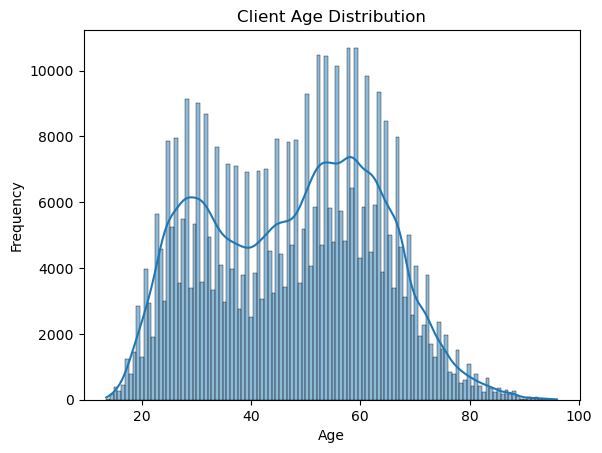

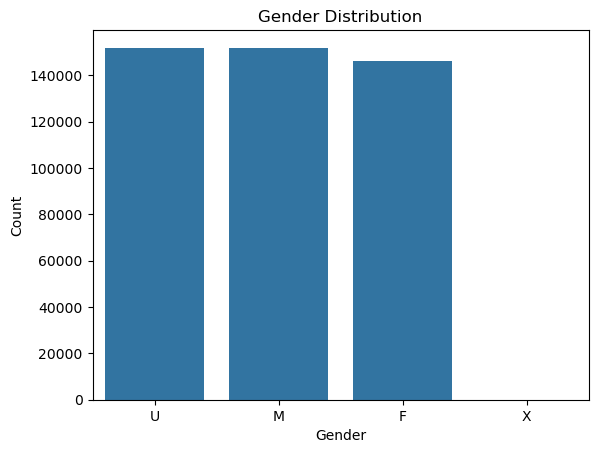

In [25]:
# Age distribution
sns.histplot(df_full['clnt_age'], kde=True)
plt.title('Client Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Gender distribution
sns.countplot(x='gendr', data=df_full)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


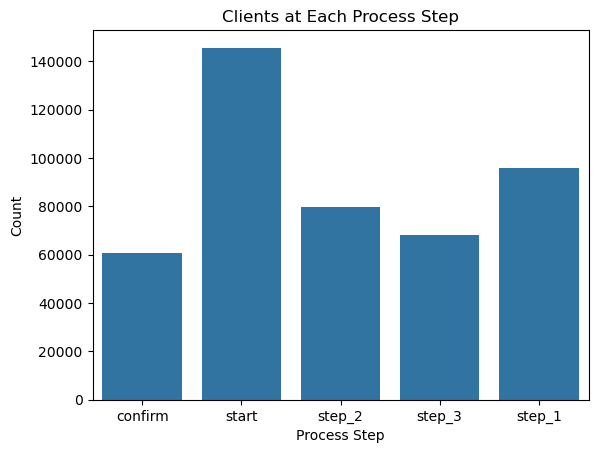

In [26]:
# Count the number of clients at each process step
sns.countplot(x='process_step', data=df_full)
plt.title('Clients at Each Process Step')
plt.xlabel('Process Step')
plt.ylabel('Count')
plt.show()


In [27]:
df_final_web_data = pd.concat([df_final_web_data_pt_1, df_final_web_data_pt_2], ignore_index=True)

# Ensure correct sorting by client_id if needed
df_final_web_data.sort_values(by='client_id', inplace=True)

In [28]:
df_final_demo.shape

(70609, 9)

In [29]:
df_final_experiment_clients.shape

(70609, 2)

In [30]:
# Merge clients and experiment
df_merge_clients=pd.merge(df_final_demo, df_final_experiment_clients, on='client_id', how='left')
display(df_merge_clients)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...
70604,7993686,4.0,56.0,38.5,U,3.0,1411062.68,5.0,5.0,NaN
70605,8981690,12.0,148.0,31.0,M,2.0,101867.07,6.0,6.0,NaN
70606,333913,16.0,198.0,61.5,F,2.0,40745.00,3.0,3.0,NaN
70607,1573142,21.0,255.0,68.0,M,3.0,475114.69,4.0,4.0,NaN


In [31]:
# Delete files with null variarion
df_merge_clients = df_merge_clients.dropna(subset=['Variation'])

In [32]:
df_merge_clients.shape

(50500, 10)

In [33]:
df_final_web_data_pt_1.head(3)

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22


In [34]:
df_final_web_data_pt_1.shape


(343141, 5)

In [35]:
df_final_web_data_pt_2.head(3)

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48


In [36]:
df_final_web_data_pt_2.shape

(412264, 5)

In [37]:
df_steps= pd.merge(df_final_web_data_pt_1, df_final_web_data_pt_2, 
                         on=['client_id', 'visitor_id', 'visit_id', 'process_step', 'date_time'], 
                         how='outer')

In [38]:
df_steps.groupby('client_id').count()

,visitor_id,visit_id,process_step,date_time
client_id,,,,
169,5,5,5,5
336,2,2,2,2
546,5,5,5,5
555,5,5,5,5
647,5,5,5,5
...,...,...,...,...
9999729,11,11,11,11
9999768,12,12,12,12
9999832,2,2,2,2


In [39]:
df_merge_clients = pd.merge(df_final_demo, df_merge_clients, on='client_id', how='inner')
df_merge_clients

,client_id,clnt_tenure_yr_x,clnt_tenure_mnth_x,clnt_age_x,gendr_x,num_accts_x,bal_x,calls_6_mnth_x,logons_6_mnth_x,clnt_tenure_yr_y,clnt_tenure_mnth_y,clnt_age_y,gendr_y,num_accts_y,bal_y,calls_6_mnth_y,logons_6_mnth_y,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0,Control
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0,Control
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
50496,6967120,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,21.0,260.0,68.5,M,3.0,4279873.38,6.0,9.0,Control
50497,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
50498,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


In [40]:
df_merge_clients.shape

(50500, 18)

In [44]:
df_merge_clients.columns

Index(['client_id', 'clnt_tenure_yr_x', 'clnt_tenure_mnth_x', 'clnt_age_x',
       'gendr_x', 'num_accts_x', 'bal_x', 'calls_6_mnth_x', 'logons_6_mnth_x',
       'clnt_tenure_yr_y', 'clnt_tenure_mnth_y', 'clnt_age_y', 'gendr_y',
       'num_accts_y', 'bal_y', 'calls_6_mnth_y', 'logons_6_mnth_y',
       'Variation'],
      dtype='object')

In [43]:
# Gráfico de barras para visionar el volumen de hombres y mujeres que probaron el test
df_test = df_merge_clients[df_merge_clients['Variation'] == 'Test']
display(df_test)

gender_counts = df_test['gendr'].value_counts()

plt.figure(figsize=(8, 5))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette='viridis')
plt.title('Número de usuarios por género en la variación "test"')
plt.xlabel('Género')
plt.ylabel('Número de usuarios')
plt.xticks(ticks=[0, 1, 2], labels=['M', 'F', 'U'])
plt.show()

,client_id,clnt_tenure_yr_x,clnt_tenure_mnth_x,clnt_age_x,gendr_x,num_accts_x,bal_x,calls_6_mnth_x,logons_6_mnth_x,clnt_tenure_yr_y,clnt_tenure_mnth_y,clnt_age_y,gendr_y,num_accts_y,bal_y,calls_6_mnth_y,logons_6_mnth_y,Variation
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0,Test
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0,Test
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0,Test
7,388801,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0,30.0,361.0,57.5,M,5.0,522498.72,1.0,4.0,Test
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0,Test
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50492,501496,23.0,281.0,35.0,F,2.0,32529.34,0.0,3.0,23.0,281.0,35.0,F,2.0,32529.34,0.0,3.0,Test
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0,Test
50497,5826160,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,20.0,249.0,56.5,F,2.0,44837.16,2.0,5.0,Test
50498,8739285,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,19.0,229.0,69.5,F,2.0,44994.24,1.0,4.0,Test


KeyError: 'gendr'

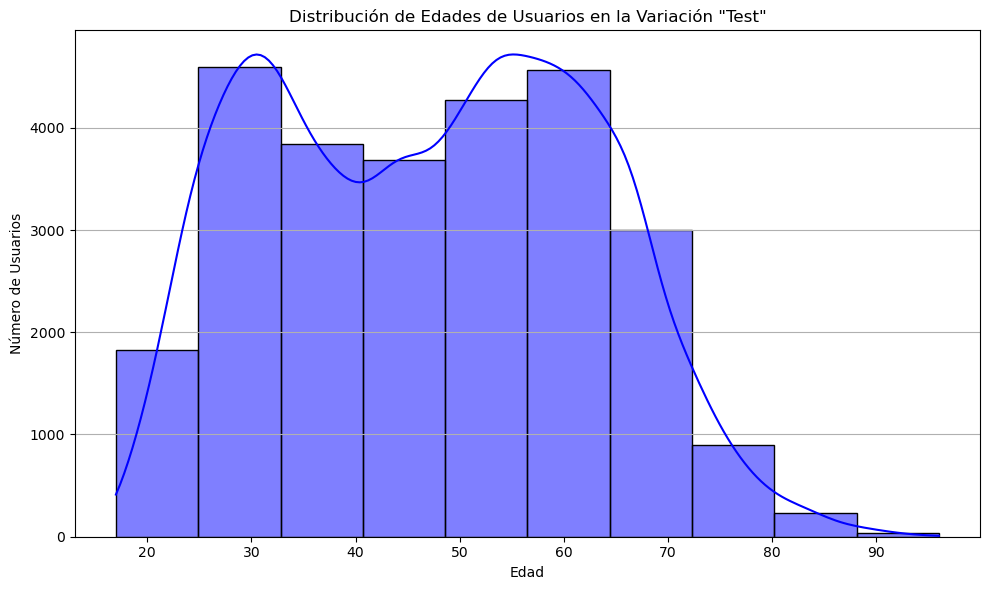

In [11]:
# Gráfico de barras para visionar las edades de los que probaron el test

df_test = df_merge_clients[df_merge_clients['Variation'] == 'Test']


plt.figure(figsize=(10, 6))
sns.histplot(df_test['clnt_age'], bins=10, kde=True, color='blue')
plt.title('Distribución de Edades de Usuarios en la Variación "Test"')
plt.xlabel('Edad')
plt.ylabel('Número de Usuarios')
plt.grid(axis='y')

plt.tight_layout() 
plt.show()

In [1]:
df_test = df_merge_clients[df_merge_clients['Variation'] == 'Control']


plt.figure(figsize=(10, 6))
sns.histplot(df_test['clnt_age'], bins=10, kde=True, color='blue')
plt.title('Distribución de Edades de Usuarios en la Variación "Control"')
plt.xlabel('Edad')
plt.ylabel('Número de Usuarios')
plt.grid(axis='y')

plt.tight_layout() 
plt.show()

NameError: name 'df_merge_clients' is not defined

In [25]:
df_final_web_data_pt_2.isnull().sum().sort_values(ascending=False)

client_id       0
visitor_id      0
visit_id        0
process_step    0
date_time       0
dtype: int64

In [4]:
df_final_demo.describe()

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,num_accts,bal,calls_6_mnth,logons_6_mnth
count,7.060900e+04,70595.000000,70595.000000,70594.000000,70595.000000,7.059500e+04,70595.000000,70595.000000
mean,5.004992e+06,12.052950,150.659367,46.442240,2.255528,1.474452e+05,3.382478,5.566740
std,2.877278e+06,6.871819,82.089854,15.591273,0.534997,3.015087e+05,2.236580,2.353286
min,1.690000e+02,2.000000,33.000000,13.500000,1.000000,1.378942e+04,0.000000,1.000000
25%,2.519329e+06,6.000000,82.000000,32.500000,2.000000,3.734683e+04,1.000000,4.000000
50%,5.016978e+06,11.000000,136.000000,47.000000,2.000000,6.333290e+04,3.000000,5.000000
75%,7.483085e+06,16.000000,192.000000,59.000000,2.000000,1.375449e+05,6.000000,7.000000
max,9.999839e+06,62.000000,749.000000,96.000000,8.000000,1.632004e+07,7.000000,9.000000


In [5]:
df_final_demo.head(5)

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
3,1562045,16.0,198.0,49.0,M,2.0,67454.65,3.0,6.0
4,5126305,12.0,145.0,33.0,F,2.0,103671.75,0.0,3.0


In [6]:
df_final_demo.num_accts.unique()

array([ 2.,  5.,  3.,  4.,  6.,  7., nan,  1.,  8.])

In [9]:
df_final_demo.gendr.unique()

array(['U', 'M', 'F', nan, 'X'], dtype=object)

In [10]:
df_final_demo.isnull().sum().sort_values(ascending=False)

clnt_age            15
clnt_tenure_yr      14
clnt_tenure_mnth    14
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
client_id            0
dtype: int64

In [14]:
df_final_demo.shape

(70609, 9)

In [15]:
df_final_demo.dropna(inplace=True)

In [16]:
df_final_demo.shape

(70594, 9)

In [17]:
df_final_demo.gendr.value_counts()

gendr
U    24122
M    23724
F    22745
X        3
Name: count, dtype: int64

In [18]:
df_final_demo['gendr'].replace('X', 'U', inplace=True)

In [19]:
df_final_demo.gendr.value_counts()

gendr
U    24125
M    23724
F    22745
Name: count, dtype: int64